# Logistic Regression

**This notebook contains implementation of Logistic Regression Algorithm from scratch and also using scikit-learn library on SUV Purchase dataset. The goal here is to build a model to predict whether a given person will buy an SUV or not.**

**Step 1:** Import necessary libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)

**Step 2:** Collecting Data and performing basic Data Analysis

In [11]:
data = pd.read_csv("data/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,16804002,Male,19,76000,0


In [12]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Now, Let's perform some basic Data Cleaning and get rid of columns that we don't need

In [13]:
male = pd.get_dummies(data['Gender'], drop_first=True)
data = pd.concat([data, male], axis=1)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,16804002,Male,19,76000,0,1


In [14]:
data.drop(['Gender', 'User ID'], axis=1, inplace=True)

In [15]:
data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


**Step 3:** Split the dataset into training and testing data using *train_test_split* function of scikit-learn library

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = data.drop('Purchased', axis=1)
X = X.astype(np.float64)
Y = data['Purchased']
Y = Y.astype(np.float64)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

**Step 4:** Logistic Regression (Scikit-Learn)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = clf.predict(x_test)

Let's check the R-squared value of the model

In [24]:
clf.score(x_test, y_test)

0.8125

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test, y_pred)

0.8125

# Logistic Regression (From Scratch)

In [27]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [28]:
m = x_train.shape[0]
n = x_train.shape[1]
Y = y_train[:, None]
x_train.shape

(320, 3)

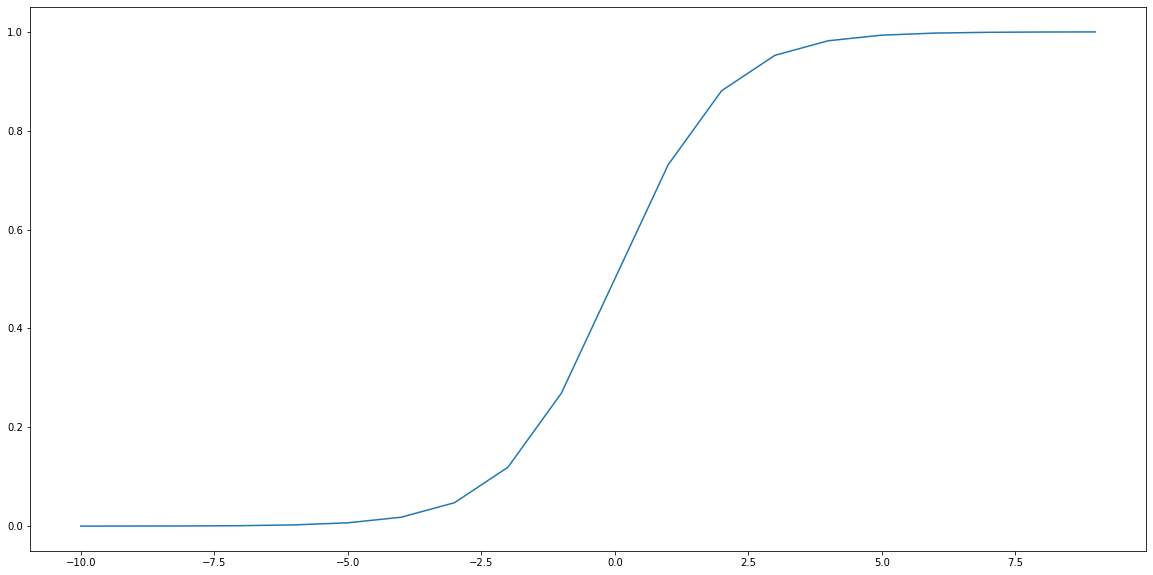

In [29]:
x = np.arange(-10, 10)
y = sigmoid(x)
plt.plot(x, y)

In [30]:
X = np.concatenate((np.ones((m, 1)), x_train), axis=1)
X.shape

(320, 4)

In [31]:
def compute_cost(X, Y, theta):
    h = sigmoid(X@theta)
    J = (-1)*(Y.T@np.log(h) + (1-Y).T@np.log(1-h))/m
    return float(J)

In [32]:
def gradient_descent(X, Y, theta, alpha=0.01, num_iters=1000):
    h = sigmoid(X@theta)
    J_hist = []
    for _ in range(num_iters):
        theta = theta - (alpha*(X.T@(h - Y))/m)
        J = compute_cost(X, Y, theta)
        J_hist.append(compute_cost(X, Y, theta))
    return theta, J_hist

In [33]:
initial_theta = np.zeros((X.shape[1], 1))
alpha = 0.01
iters = 750

In [34]:
compute_cost(X, Y, theta=np.random.randn(X.shape[1], 1))

0.9954753350975925

In [35]:
theta, J_history = gradient_descent(X, Y, initial_theta, alpha, iters)
J_history = np.array(J_history)

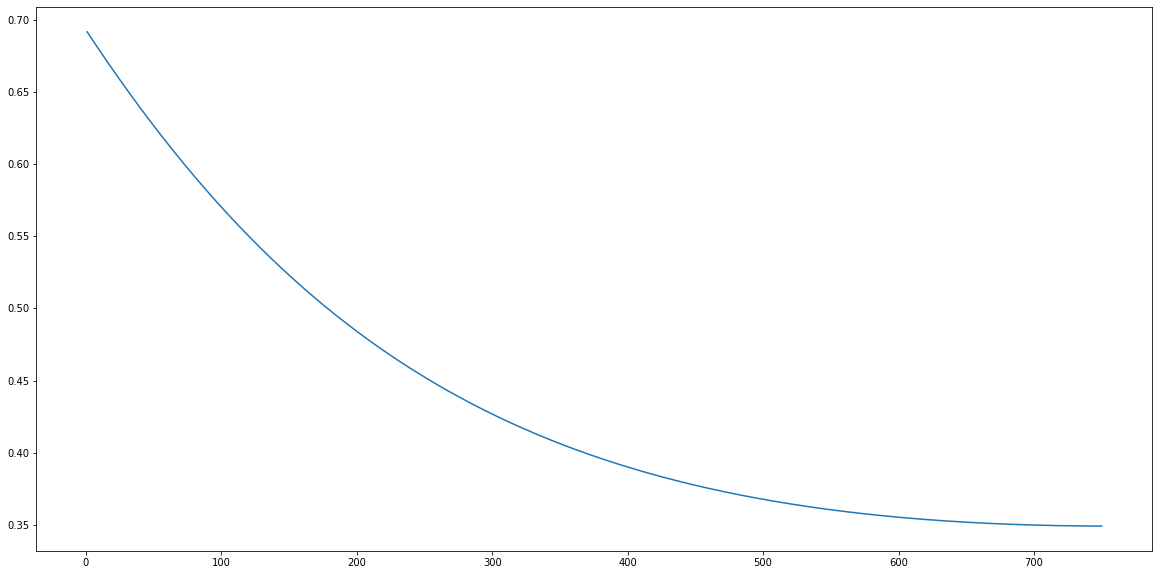

In [36]:
plt.plot(np.linspace(1, iters, iters), J_history, '-')
plt.show()

In [37]:
x_test = np.concatenate((np.ones((x_test.shape[0], 1)), x_test), axis=1)

In [38]:
p = sigmoid(x_test@theta)

In [39]:
p = (p >= 0.5)
y_predicts = 1*p

In [40]:
accuracy_score(y_predicts, y_test)

0.8375